# Homework 1 : Batch Gradient Descent, Cost Optimization

## The Problem
Implement a linear regression algorithm as a gradient descent optimization that will measure how statistically dependent two variables are and apply the algorithm on the test datasets.

- The test dataset is historical fishery harvest and effort data for three groups of stakeholders
    1. Dipnet Fishermen
    2. Driftnet Fishermen
    3. Setnet Fishermen
- Data recorded on annual basis for last 15 - 30 years.
- Free variable : days fished (or permits issued)
- How correlated (or dependent) the harvest is on the fishermen's effort.

## The Procedure
- Implement regression model as cost optimization algorithm that uses batch gradient descent 
- The regression model should test function of batch size on model convergence
- Show error loss function (Y axis) over time (X axis) as function of tested batch size and number of training epochs
- Give all resulting parametric linear correlations for each dataset



## The Big Picture
- Gradient Descent : optimization algorithm often used for finding the weights or coefficients of machine learning algorithms. It works by having the model make predictions on training data and using the error on the predicitions to update the model in such a way as to reduce error.
- The gaol is to find model parameters that minimize the error of the model on the training dataset

The following is pseudocode for gradient descent

```python
model = initialization(...)
n_epochs = ...
train_data = ...
for i in n_epochs:
    train_data = shuffle(train_data)
```




## After fitting the data
- Use R squared for goodness of fit
- R-squared: Percentage of response variation explain by linear model


# _Let's get started..._

***

## Part 1: Examine the data
The first step is to read the csv files, format the datasets as DataFrame objects, and examine the plots with regression lines based on default b0 and b1 weights.

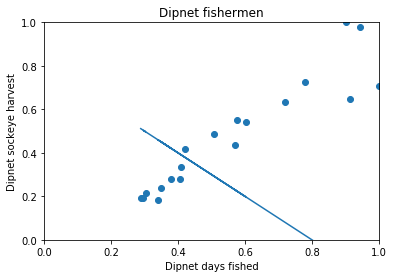

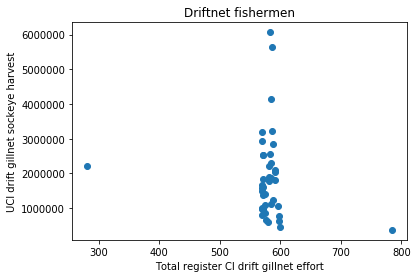

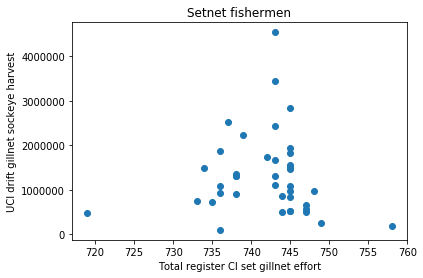

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


batch_sizes = [1,5,10,15,20]
b1 = -1.0
b0 = 0.8

# Load dataframes
dip_df = pd.read_csv("dip-har-eff.csv")
drift_df = pd.read_csv("drift-har-eff.csv")
set_df = pd.read_csv("set-har-eff.csv")

# Gather info
dip_X = dip_df.iloc[:,1]
dip_Y = dip_df.iloc[:,2]

dip_X_max = np.max(dip_X)
dip_Y_max = np.max(dip_Y)

X = np.true_divide (dip_X, dip_X_max)
Y = np.true_divide (dip_Y, dip_Y_max)

plt.title('Dipnet fishermen')
plt.xlabel('Dipnet days fished')
plt.ylabel('Dipnet sockeye harvest')
plt.xlim(0,max(X))
plt.ylim(0,max(Y))
plt.scatter(X, Y)
plt.plot (X, b1*X + b0)

plt.show()

drift_X = drift_df.iloc[:,1]
drift_Y = drift_df.iloc[:,2]
drift_X_max = np.max(drift_X)
drift_Y_max = np.max(drift_Y)

plt.title('Driftnet fishermen')
plt.xlabel('Total register CI drift gillnet effort')
plt.ylabel('UCI drift gillnet sockeye harvest')
plt.scatter(drift_X, drift_Y)

plt.show()

set_X = set_df.iloc[:,1]
set_Y = set_df.iloc[:,2]
set_X_max = np.max(set_X)
set_Y_max = np.max(set_Y)

plt.title('Setnet fishermen')
plt.xlabel('Total register CI set gillnet effort')
plt.ylabel('UCI drift gillnet sockeye harvest')
plt.scatter(set_X, set_Y)

plt.show()

In [15]:
# Build the model
m = 0
c = 0
learning_rate = 0.0001

epochs = 20

n = float(len(dip_X))

for i in range(len(dip_X)):
    Y_pred = m*dip_X + c
    D_m = (-2/n) * sum(dip_X * (dip_Y - Y_pred))
    D_c = (-2/n) * sum(dip_Y - Y_pred)
    m = m - learning_rate * D_m
    c = c - learning_rate * D_c
print(m, c)



1.02113109175e+96 4.23560847965e+91


In [ ]:
# Mean Squared Error
def mse(b1, x1, b0, y1):
    return ((predictions) ** 2 + (predictions)**2)

In [ ]:
# Root Mean Squared Error
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

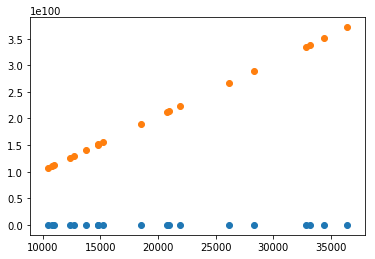

In [12]:
# Making predictions
Y_pred = m*dip_X + c
plt.scatter(dip_X, dip_Y)
plt.scatter(dip_X, Y_pred)
plt.show()


In [ ]:
def partialDerivative(Y, Y_pred):
    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)
    m = m - learning_rate * D_m
    c = c - learning_rate * D_c

In [13]:
def meanSquaredError(N):
    actual = 1
    predicted = 0
    return (1/(2*N))* (sum(actual - predicted) ** 2)

In [16]:
def calculateCost(theta, X, y):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1/2*m) * np.sum(np.square(predictions = y))
    return cost